In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [4]:
np.random.seed(42)

In [5]:
data = pd.read_csv('fire_risk_train.csv')
data

,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,fire_risk_score,fire_risk_level,random_noise
0,19.939478,14.613031,3.309713,51.580079,0.882388,2.426881,36.298824,Low,-1.349549
1,18.871172,45.988347,2.928750,54.831865,0.661799,3.573987,41.477312,Medium,-0.042336
2,20.003489,10.000000,1.009550,62.969945,0.348045,2.022868,39.487676,Low,-1.128474
3,17.908171,65.904458,3.521618,52.246847,0.400091,2.932591,43.355859,Medium,0.113624
4,28.292721,30.808170,4.020409,52.858654,0.403075,2.334457,55.468398,Medium,0.264644
...,...,...,...,...,...,...,...,...,...
235,29.751538,51.999129,3.421227,60.536824,0.095922,3.067803,33.931698,Low,-0.503421
236,21.691068,72.159161,1.704867,70.251426,0.658480,2.186454,42.633949,Medium,-1.376730
237,35.281036,34.525709,2.206417,60.448092,0.290198,3.966357,24.272872,Low,0.801164
238,21.996807,31.834259,0.583387,61.509936,0.527731,2.375698,27.089659,Low,0.069548


# Data Cleaning

In [7]:
#checking missing values
print('Missing Values:\n', data.isnull().sum())
# check for duplicates
print ('\nDuplicates:', data.duplicated().sum())

Missing Values:
 temperature_C                  0
humidity_percent               0
wind_speed_kmph                0
air_quality_index              0
vegetation_index               0
emergency_response_time_min    0
fire_risk_score                0
fire_risk_level                0
random_noise                   0
dtype: int64

Duplicates: 0


# Exploratory Data Analysis (EDA)

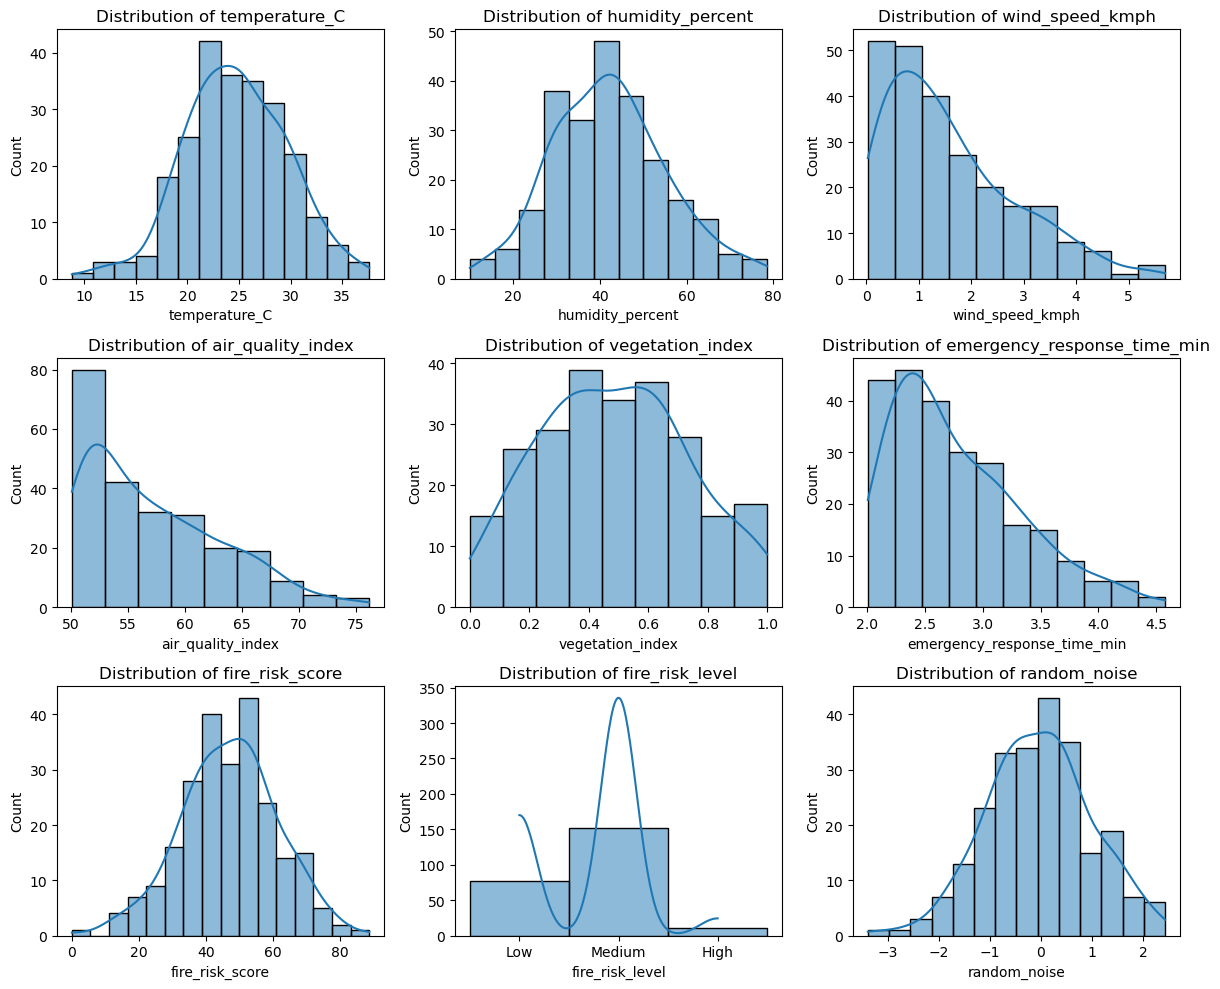

In [ ]:
# Distribution of numerical features
plt.figure(figsize=(12, 10))

for i, col in enumerate([
    'temperature_C','humidity_percent','wind_speed_kmph',
    'air_quality_index','vegetation_index','emergency_response_time_min',
    'fire_risk_score','fire_risk_level','random_noise'
]):
    plt.subplot(3, 3, i + 1)   # 👈 i + 1 is the key fix
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


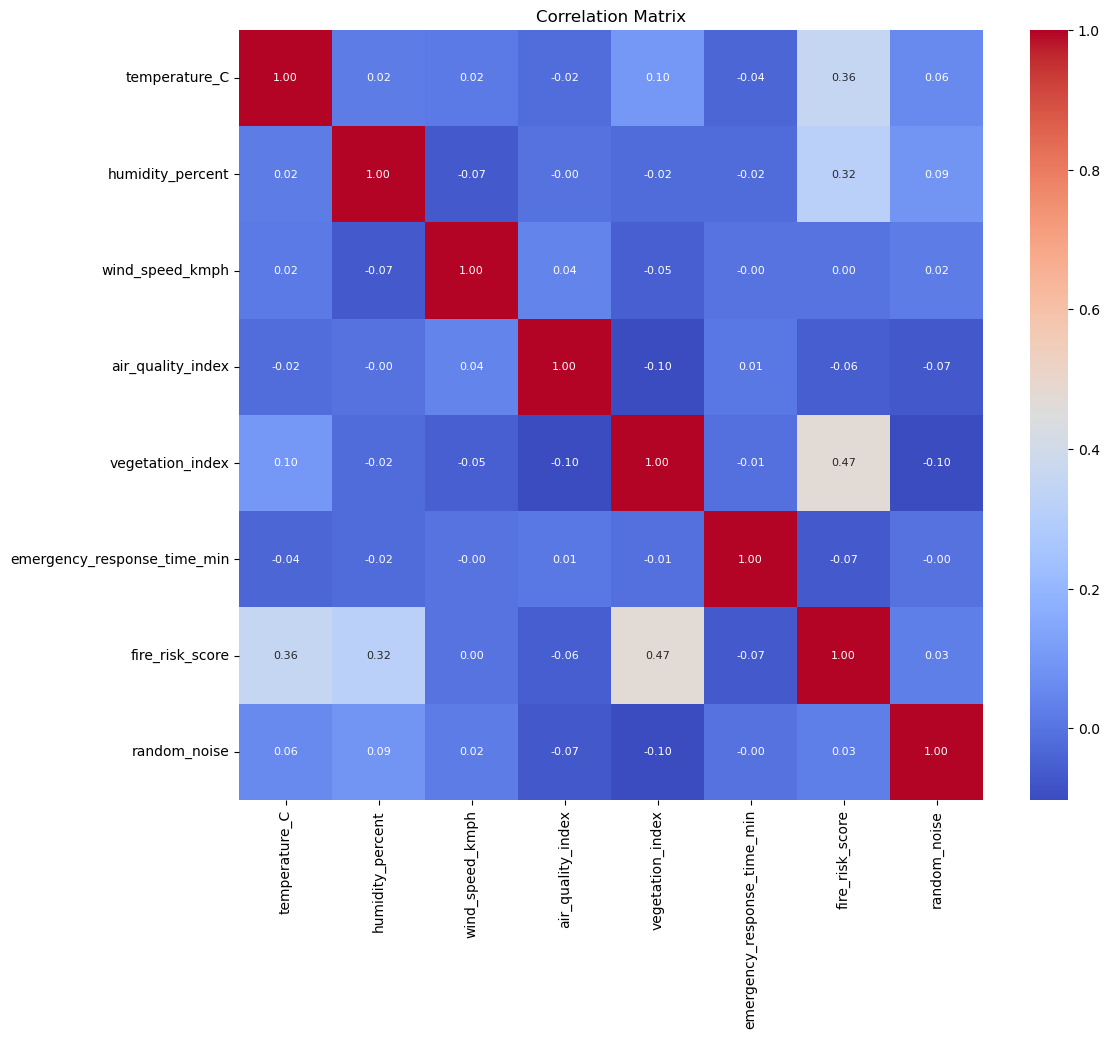

In [ ]:
plt.figure(figsize=(12, 10))

corr_matrix = data.select_dtypes(include=np.number).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 8}   # smaller text
)

plt.title('Correlation Matrix')
plt.show()


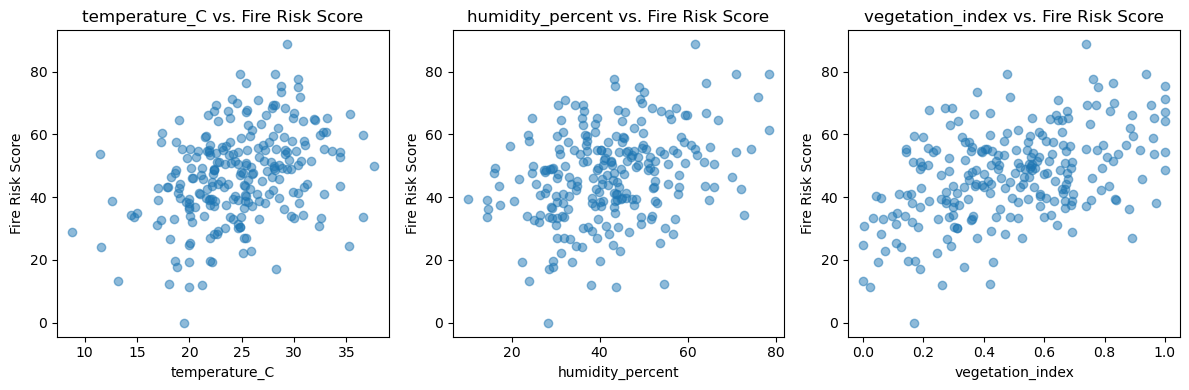

In [15]:
# Scatter plots of features vs. risk_level
plt.figure(figsize=(12, 4))
for i, col in enumerate(['temperature_C', 'humidity_percent', 'vegetation_index'], 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[col], data['fire_risk_score'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Fire Risk Score')
    plt.title(f'{col} vs. Fire Risk Score')
plt.tight_layout()
plt.show()


# Preprocessing

In [23]:
x = data.drop('fire_risk_score', axis = 1)
y = data['fire_risk_score']

In [22]:
x.head(10)

,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,fire_risk_level,random_noise
0,19.939478,14.613031,3.309713,51.580079,0.882388,2.426881,Low,-1.349549
1,18.871172,45.988347,2.928750,54.831865,0.661799,3.573987,Medium,-0.042336
2,20.003489,10.000000,1.009550,62.969945,0.348045,2.022868,Low,-1.128474
3,17.908171,65.904458,3.521618,52.246847,0.400091,2.932591,Medium,0.113624
4,28.292721,30.808170,4.020409,52.858654,0.403075,2.334457,Medium,0.264644
5,34.430930,34.859282,0.349156,51.612857,0.299431,2.404051,Medium,0.378666
6,23.453955,17.429194,1.504313,50.824398,0.690014,3.457551,Low,0.350342
7,33.068556,39.037925,0.907069,53.213572,0.582191,2.421921,Medium,-0.323238
8,21.435771,31.395070,0.212860,50.327533,0.363285,2.543425,Low,-0.881434
9,32.463443,36.602817,0.542247,59.135846,0.591841,2.803179,Medium,0.615701


In [24]:
y.head()

0    36.298824
1    41.477312
2    39.487676
3    43.355859
4    55.468398
Name: fire_risk_score, dtype: float64

# SIMPLE LINEAR REGRESSION

In [40]:
X = data[['vegetation_index']]   # keep it 2D
y = data['fire_risk_score']


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred = model.predict(X)

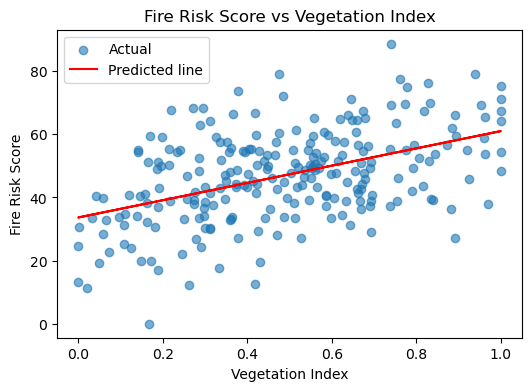

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.6, label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted line')
plt.xlabel('Vegetation Index')
plt.ylabel('Fire Risk Score')
plt.title('Fire Risk Score vs Vegetation Index')
plt.legend()
plt.show()

# fire_risk_score = w * vegetationindex + b


In [ ]:
w = model.coef_[0]
b = model.intercept_

print("w (slope):", w)
print("b (intercept):", b)

# fire_risk_score = w * vegetation_index + b
# fire_risk_score = 27.39 * vegetation_index + 33.65

w (slope): 27.38816312108085
b (intercept): 33.65333924310576


# MULTIPLE LINEAR REGRESSION

In [52]:
train = pd.read_csv("fire_risk_train.csv")
test  = pd.read_csv("fire_risk_test.csv")

feature_cols = [
    "temperature_C",
    "humidity_percent",
    "wind_speed_kmph",
    "air_quality_index",
    "vegetation_index",
    "emergency_response_time_min",
    "random_noise"
]

X = train[feature_cols]
y = train["fire_risk_score"]


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [55]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", LinearRegression())
])

model.fit(X_train, y_train)


,steps,"[('scaler', ...), ('reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred = model.predict(X_val)

print("Validation R²:", r2_score(y_val, y_val_pred))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))


Validation R²: 0.2587520944041187
Validation MSE: 116.41683855266079


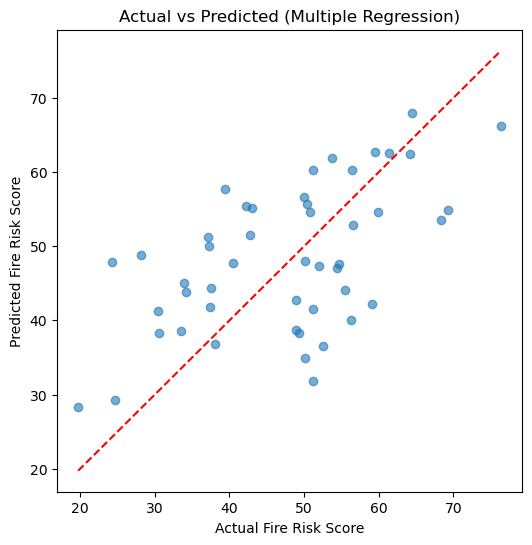

In [58]:
y_val_pred = model.predict(X_val)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         'r--')
plt.xlabel("Actual Fire Risk Score")
plt.ylabel("Predicted Fire Risk Score")
plt.title("Actual vs Predicted (Multiple Regression)")
plt.show()


In [63]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load training data
train = pd.read_csv("fire_risk_train.csv")

# Features (numeric only, matches your test file too)
feature_cols = [
    "temperature_C",
    "humidity_percent",
    "wind_speed_kmph",
    "air_quality_index",
    "vegetation_index",
    "emergency_response_time_min",
    "random_noise"
]

X_train = train[feature_cols]
y_train = train["fire_risk_score"]

# Create pipeline (preprocess + model)
fire_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Fit pipeline
fire_pipeline.fit(X_train, y_train)

# Prediction function (like your example)
def predict_fire_risk_score(temperature_C, humidity_percent, wind_speed_kmph,
                            air_quality_index, vegetation_index,
                            emergency_response_time_min, random_noise):
    input_data = pd.DataFrame({
        "temperature_C": [temperature_C],
        "humidity_percent": [humidity_percent],
        "wind_speed_kmph": [wind_speed_kmph],
        "air_quality_index": [air_quality_index],
        "vegetation_index": [vegetation_index],
        "emergency_response_time_min": [emergency_response_time_min],
        "random_noise": [random_noise]
    })
    return fire_pipeline.predict(input_data)[0]

example = predict_fire_risk_score(
    temperature_C=35,
    humidity_percent=30,
    wind_speed_kmph=20,
    air_quality_index=120,
    vegetation_index=0.45,
    emergency_response_time_min=12,
    random_noise=0.10
)

result = pd.DataFrame({
    "temperature_C": [35],
    "humidity_percent": [30],
    "wind_speed_kmph": [20],
    "air_quality_index": [120],
    "vegetation_index": [0.45],
    "emergency_response_time_min": [12],
    "random_noise": [0.10],
    "predicted_fire_risk_score": [round(example, 4)]
})

print(result)



   temperature_C  humidity_percent  wind_speed_kmph  air_quality_index  \
0             35                30               20                120   

   vegetation_index  emergency_response_time_min  random_noise  \
0              0.45                           12           0.1   

   predicted_fire_risk_score  
0                    48.9725  
